In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv(r'C:\Users\Suvakanta\Desktop\DS_Internship_2023\Data Analysis\scores_data.csv')
df

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7
...,...,...,...
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [8]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

In [11]:
df.columns=df.columns.str.replace(' ','')
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [13]:
df['Score']=df['Score'].str.replace(' / 7','')

In [19]:
df['Score']=df['Score'].astype('int')

In [15]:
df['Total marks']=7

In [20]:
df.head()

,Batch,User_ID,Score,Total marks
0,AI_ELITE_7,uid_149,6,7
1,AI_ELITE_7,uid_148,6,7
2,AI_ELITE_7,uid_147,7,7
3,AI_ELITE_7,uid_146,7,7
4,AI_ELITE_7,uid_145,4,7


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2   Score        149 non-null    int32 
 3   Total marks  149 non-null    int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 4.2+ KB


In [24]:
df['Score'].describe()

count    149.000000
mean       4.382550
std        1.592199
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: Score, dtype: float64

<AxesSubplot:ylabel='Density'>

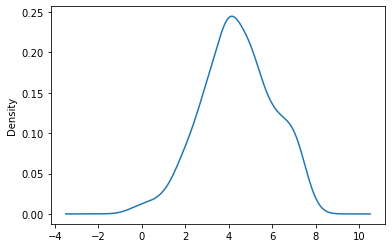

In [25]:
df['Score'].plot(kind='kde')

<AxesSubplot:>

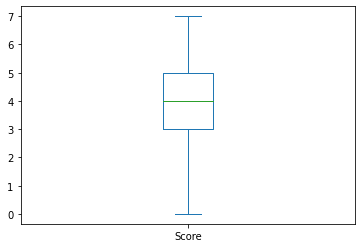

In [26]:
df['Score'].plot(kind='box')

In [33]:
# Batch wise performance
df.pivot_table( values='Score',index='Batch',aggfunc=['count','min','max','mean'])

,count,min,max,mean
,Score,Score,Score,Score
Batch,,,,
AI_ELITE_4,48,0,7,3.791667
AI_ELITE_6,48,0,7,4.229167
AI_ELITE_7,53,2,7,5.056604


In [122]:
df['Batch'].unique()

array(['AI_ELITE_7', 'AI_ELITE_6', 'AI_ELITE_4'], dtype=object)

In [146]:
# Number of students having high score & low score
print('Total high score students :',df['Score'].loc[df['Score']==7].count())
print()
print('Total low score students :',df['Score'].loc[df['Score']==0].count())

Total high score students : 18

Total low score students : 2


In [147]:
# Percentage of high score & low score
print((df['Score'].loc[df['Score']==7].count()/len(df))*100)
print()
print((df['Score'].loc[df['Score']==0].count()/len(df))*100)

12.080536912751679

1.342281879194631


In [132]:
# Perfomance of AI_ELITE_4 batch
df_AI_ELITE_4=df[df['Batch'].isin(['AI_ELITE_4'])]
print((df_AI_ELITE_4['Score'].loc[df_AI_ELITE_4['Score']>df_AI_ELITE_4['Score'].mean()].count()/len(df_AI_ELITE_4))*100)
print()
print((df_AI_ELITE_4['Score'].loc[df_AI_ELITE_4['Score']>df['Score'].mean()].count()/len(df))*100)

64.58333333333334

8.053691275167784


In [131]:
# Perfomance of AI_ELITE_6 batch
df_AI_ELITE_6=df[df['Batch'].isin(['AI_ELITE_6'])]
print((df_AI_ELITE_6['Score'].loc[df_AI_ELITE_6['Score']>df_AI_ELITE_6['Score'].mean()].count()/len(df_AI_ELITE_6))*100)
print()
print((df_AI_ELITE_6['Score'].loc[df_AI_ELITE_6['Score']>df['Score'].mean()].count()/len(df))*100)

45.83333333333333

14.76510067114094


In [133]:
# Perfomance of AI_ELITE_7 batch
df_AI_ELITE_7=df[df['Batch'].isin(['AI_ELITE_7'])]
print((df_AI_ELITE_7['Score'].loc[df_AI_ELITE_7['Score']>df_AI_ELITE_7['Score'].mean()].count()/len(df_AI_ELITE_7))*100)
print()
print((df_AI_ELITE_7['Score'].loc[df_AI_ELITE_7['Score']>df['Score'].mean()].count()/len(df))*100)

43.39622641509434

22.818791946308725


<AxesSubplot:xlabel='Batch', ylabel='Score'>

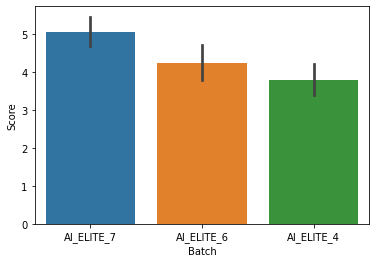

In [141]:
sns.barplot(x=df.Batch,y=df.Score)

### Insights

1. There are three batches in the dataset. Among them AI_ELITE_7 is having high mean score which is 5.05 that means the performance of this batch is quite good as compared to other batches.
2. From the entire batch got to know that 18 students out of 150 are having the highest marks and only 2 students have the low marks.
3. So 12% of students from the entire batch are doing well which is very low in terms of performance and 1% of student is having marks 0 which is quite good.
4. 64.5% of AI_ELITE_4 batch score is above average from its own batch and 8% from the entire batch.
5. Similarly 45.8% of AI_ELITE_6 batch score is above average from its own batch and 14% from the entire batch.
6. 43.3% of AI_ELITE_7 batch score is above average from its own batch and 22% from the entire batch.
7. So from the above analysis I concluded that AI_ELITE_4 batch students are not performing well compared to other batches and when it comes to entire batch performance AI_ELITE_7 batch students are better than others.